Data Preparation

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil

# Load the dataset
file_path = 'netflix_data.csv'

# Define the new file name
renamed_file_path = 'Netflix_shows_movies.csv'

# Rename the file (if it's a zip, unzip first)
if file_path.endswith('.zip'):
    # Unzip and rename logic here if provided a zip
    pass
else:
    # Rename the file directly
    shutil.move(file_path, renamed_file_path)

# Load the renamed dataset to verify
netflix_data = pd.read_csv(renamed_file_path)
renamed_file_path, netflix_data.head()


('Netflix_shows_movies.csv',
     show_id     type                                    title  \
 0  81145628    Movie  Norm of the North: King Sized Adventure   
 1  80117401    Movie               Jandino: Whatever it Takes   
 2  70234439  TV Show                       Transformers Prime   
 3  80058654  TV Show         Transformers: Robots in Disguise   
 4  80125979    Movie                             #realityhigh   
 
                    director  \
 0  Richard Finn, Tim Maltby   
 1                       NaN   
 2                       NaN   
 3                       NaN   
 4          Fernando Lebrija   
 
                                                 cast  \
 0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
 1                                   Jandino Asporaat   
 2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
 3  Will Friedle, Darren Criss, Constance Zimmer, ...   
 4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
 
                                   

Data Cleaning

In [5]:
# Check for missing values in the dataset
missing_values = netflix_data.isnull().sum()

# Display the missing values for each column
missing_values

# Clean missing values based on the outlined strategy
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Not Available', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)
netflix_data['date_added'].fillna('Not Added', inplace=True)
netflix_data['rating'].fillna('Not Rated', inplace=True)

# Verify if all missing values have been addressed
missing_values_after_cleaning = netflix_data.isnull().sum()
missing_values_after_cleaning


C:\Users\Paul.Ngugi\AppData\Local\Temp\ipykernel_6368\491631253.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['director'].fillna('Unknown', inplace=True)
C:\Users\Paul.Ngugi\AppData\Local\Temp\ipykernel_6368\491631253.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Data Exploration

(6234, 12)
show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000
type
Movie      4265
TV Show    1969
Name: count, dtype: int64
release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2016     830
2017     959
2018    1063
2019     843
2020      25
Name: type, Length: 72, dtype: int64
listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, Interna

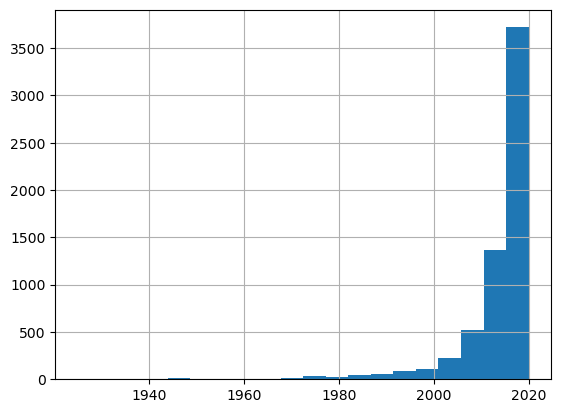

In [6]:
# Check the shape of the data
print(netflix_data.shape)

# Display column data types
print(netflix_data.dtypes)

# Summary statistics for numerical data
print(netflix_data.describe())

# Frequency counts for categorical columns
print(netflix_data['type'].value_counts())

# Distribution of release years
netflix_data['release_year'].hist(bins=20)

# Number of shows/movies released per year
print(netflix_data.groupby('release_year')['type'].count())

# Most common genres
print(netflix_data['listed_in'].value_counts())


Data Visualization for Most watched genres

C:\Users\Paul.Ngugi\AppData\Local\Temp\ipykernel_6368\2103960607.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='viridis')


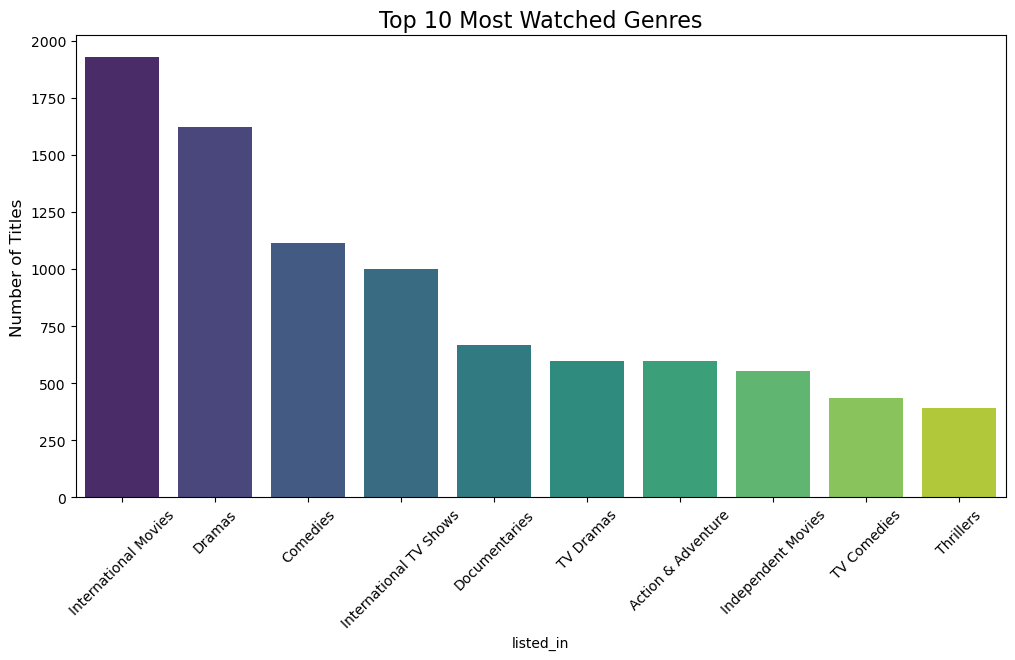

In [7]:
# Split genres into a list and explode
genres = netflix_data['listed_in'].str.split(', ').explode()

# Count the frequency of each genre
genre_counts = genres.value_counts()

# Plot the most popular genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='viridis')
plt.title('Top 10 Most Watched Genres', fontsize=16)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Data visualization for ratings distribution

C:\Users\Paul.Ngugi\AppData\Local\Temp\ipykernel_6368\2921738414.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


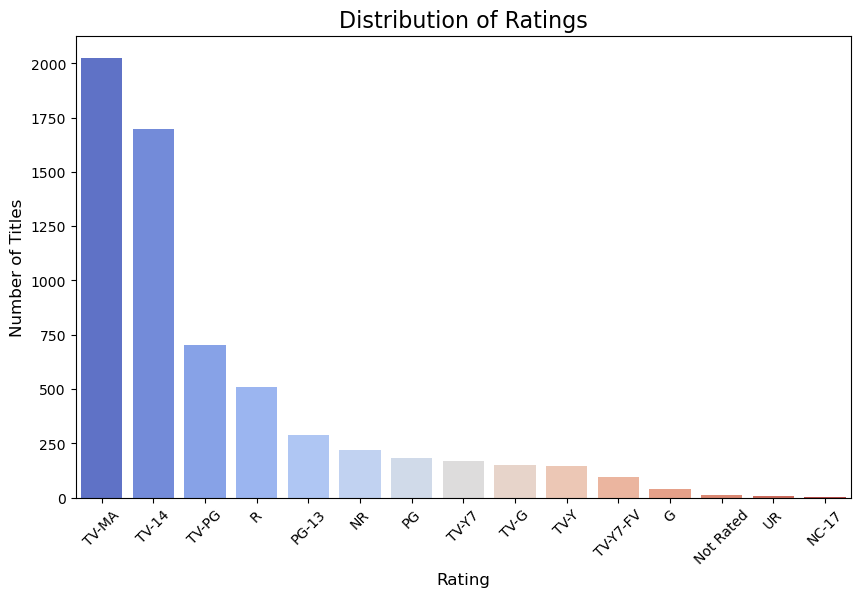

In [8]:
# Count the frequency of each rating
rating_counts = netflix_data['rating'].value_counts()

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Distribution of Ratings', fontsize=16)
plt.ylabel('Number of Titles', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()
plt.savefig('distribution_of_ratings.png')  # Save as PNG
plt.close()